In [1]:
import numpy as np
import random
import scipy as sp
import pandas as pd
import seaborn as sns
import sklearn.linear_model
import matplotlib.pyplot as plt
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import gaussian_kde as GKDE
from scipy.stats import uniform, norm, beta,skewnorm,gamma
from mpl_toolkits import mplot3d
import scipy.io as sio
from scipy.stats import uniform, norm, beta,skewnorm,gamma, beta, f_oneway, wilcoxon,kruskal, ranksums
from statsmodels.distributions.empirical_distribution import ECDF
from joblib import dump, load
from astropy.table import Table, Column
import scikit_posthocs as sp
import statistics

In [219]:
nSamp = 10000
nItr=200
#nItr=10000
seedinit1 = 1
as1=np.zeros(nSamp)
as2=np.zeros(nSamp)
np.random.seed(seedinit1)
SV=np.random.uniform(0.15,0.5,1)   
unifs1=np.random.uniform(0,1,nSamp)
for i in range(nSamp):
    if unifs1[i] <= SV:
        as1[i]=1

seedinit2 = seedinit1+1
np.random.seed(seedinit2)            
unifs2=np.random.uniform(0,1,nSamp)
for j in range(nSamp):
    if unifs2[j] <= SV:
        as2[j]=1
    
Xs=as1+as2

In [5]:
dataNHW=pd.read_csv('dataNHW.csv')
dataNHW=dataNHW.iloc[:,1:]
dataNHW

,FID,IID,factor1_scores,factor2scoresflipped,factor3_scores,factor4_scores,factor5_scores,age_enroll,gender,SmokCigNow,...,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,Emphysema-PredominantAxis,Airway-Predominant Axis
0,10005Q,10005Q,-0.289564,-1.385945,-0.220869,0.723142,-0.566232,54.5,2,1,...,0.0052,-0.0107,0.0098,0.0304,-0.0026,-0.0077,-0.0045,0.0127,0.097005,-1.407849
1,10009Y,10009Y,1.643516,-0.033903,0.129201,0.352619,-0.040469,69.1,1,0,...,-0.0041,0.0004,-0.0031,-0.0032,-0.0026,0.0043,-0.0033,0.0089,1.308323,-0.053703
2,10010J,10010J,-0.237892,1.379126,0.852796,-0.812451,0.036806,66.0,2,1,...,0.0019,-0.0039,0.0129,-0.0315,0.0104,-0.0092,-0.0063,-0.0004,-0.056135,1.169453
3,10011L,10011L,-0.331558,0.357409,0.174373,1.160877,-0.163186,69.8,2,0,...,0.0073,0.0177,-0.0044,-0.0097,-0.0087,-0.0042,-0.0113,0.0085,-0.546883,0.624680
4,10013P,10013P,0.779035,-0.064067,1.073631,0.205609,1.447530,73.4,2,0,...,-0.0023,-0.0178,0.0076,0.0027,0.0009,-0.0114,0.0045,-0.0034,0.220717,-0.201228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5521,25425R,25425R,-1.290004,0.861130,-0.625362,0.036013,-0.843193,57.0,2,1,...,-0.0085,-0.0117,-0.0060,-0.0159,-0.0011,0.0002,-0.0047,0.0227,-0.934298,0.807734
5522,25426T,25426T,0.068391,-1.136712,0.479174,-2.313996,0.394962,45.1,1,1,...,-0.0016,-0.0154,0.0031,0.0009,0.0127,0.0104,0.0129,-0.0085,0.670054,-1.002598
5523,25428X,25428X,-1.222220,0.808978,-1.621980,0.160980,-0.537561,45.7,1,1,...,-0.0048,0.0125,-0.0100,-0.0121,-0.0154,0.0106,0.0119,-0.0041,-0.540777,0.848761
5524,25429Z,25429Z,-0.153398,-0.841192,-1.318666,-1.127998,0.612452,55.4,1,0,...,0.0039,-0.0084,0.0034,-0.0002,0.0204,0.0079,0.0018,0.0212,-0.286348,-0.690034


In [13]:
y=dataNHW["Emphysema-PredominantAxis"].values

In [11]:
y=dataNHW["Airway-Predominant Axis"].values

In [14]:
np.std(y)

0.931204192162486

In [220]:
Xs_bar=np.mean(Xs)
Sxx = np.sum(Xs*Xs)-nSamp*Xs_bar*Xs_bar

sigma2=0.9*.9

SEb= np.sqrt(sigma2/Sxx)
print(SEb)

print()
SEe=.9-SEb
print(SEe)

0.013845073972497422

0.8861549260275026


In [221]:
N0=0
N1=0
N2=0
for i in range(nSamp):
    if Xs[i]==0 :
        N0=N0+1
    elif Xs[i]==1:
        N1=N1+1
    else:
        N2=N2+1

print(N0)
print(N1)
print(N2) 

4826
4251
923


In [222]:
(N0*0+N1*1+N2*2)/20000

0.30485

In [223]:
seedinit3 = seedinit2+1
np.random.seed(seedinit3)

B0= skewnorm.rvs(.7,loc=-.3976 ,scale=.9, size=N0)
B1= skewnorm.rvs(-1.5,loc=.8259, scale=1.1, size=N1)
B2= skewnorm.rvs(-2.5,loc=1.1037 , scale=1.2, size=N2)

#B0= norm.rvs(loc=0 , scal.2=1.7, size=N0)
#B1= skewnorm.rvs(.5,loc=.1, scale=1.7, size=N1)
#B2= skewnorm.rvs(.7,loc=.2 , scale=1.7, size=N2)

e0=np.random.normal(0,SEb,size=N0)
e1=np.random.normal(0,SEb,size=N1)
e2=np.random.normal(0,SEb,size=N2)


#B=np.repeat(B,nSamp)
#Xs=np.tile(Xs,nItr)
#e=np.tile(e,nItr)

y_obs0=B0+e0
y_obs1=B1+e1
y_obs2=B2+e2

#y_obs = np.random.uniform(low=-5, high=5, size=nSamp)
#y_obs = skewnorm.rvs(1,loc=-.45, scale=1.7,size=nSamp)

#kde_y_obs= GKDE(y_obs)


index0=np.where(Xs == 0)
index1=np.where(Xs == 1)
index2=np.where(Xs == 2)

Xs0=Xs[index0]
Xs1=Xs[index1]
Xs2=Xs[index2]

#y_obs0=y_obs[index0]
#y_obs1=y_obs[index1]
#y_obs2=y_obs[index2]

kde_y_obs0= GKDE(y_obs0)
kde_y_obs1= GKDE(y_obs1)
kde_y_obs2= GKDE(y_obs2)

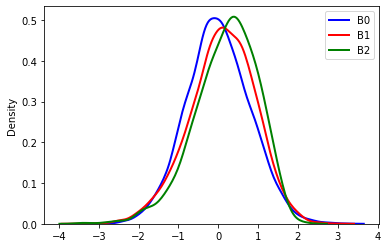

In [224]:
ax=sns.kdeplot(B0,color='b',label='B0',linewidth=2)
ax=sns.kdeplot(B1,color='r',label='B1',linewidth=2)
ax=sns.kdeplot(B2,color='g',label='B2',linewidth=2)
ax.legend()

In [225]:
y_obs0_bar=np.mean(y_obs0)

Sy0 = np.sum(y_obs0*y_obs0)-N0*y_obs0_bar*y_obs0_bar

SEy0= np.sqrt(Sy0/(N0-1))


y_obs1_bar=np.mean(y_obs1)

Sy1 = np.sum(y_obs1*y_obs1)-N1*y_obs1_bar*y_obs1_bar

SEy1= np.sqrt(Sy1/(N1-1))


y_obs2_bar=np.mean(y_obs2)

Sy2 = np.sum(y_obs2*y_obs2)-N2*y_obs2_bar*y_obs2_bar

SEy2= np.sqrt(Sy2/(N2-1))

y=np.concatenate((y_obs0, y_obs1,y_obs2), axis=None) 
Xs=np.concatenate((Xs0,Xs1,Xs2), axis=None) 

print(SEy0)
print(SEy1)
print(SEy2)

0.7996179880319323
0.8260124083130642
0.7871718443705277


In [226]:
statistics.stdev(y_obs0)

0.7996179880319322

In [227]:
print(B0.mean())
print(B1.mean())
print(B2.mean())

-2.4359500821133102e-05
0.10002816272648005
0.20007930032041096


In [228]:
print(y_obs0_bar)
print(y_obs1_bar)
print(y_obs2_bar)

-6.909580730005599e-05
0.0999832295484171
0.20001707241644598


Parametrs =  -6.737964335530588e-05 [0.10004671]


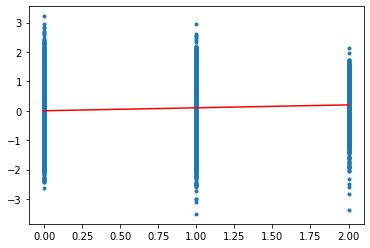

In [229]:
#X=np.concatenate((Xs0, Xs1,Xs2), axis=None) 

lin_reg= sklearn.linear_model.LinearRegression()
lin_reg.fit(np.c_[Xs],y)
print('Parametrs = ', lin_reg.intercept_ ,  lin_reg.coef_)

plt.plot(Xs, y,'.');
plt.plot(np.array([0, 2]), lin_reg.predict(np.c_[np.array([0,2])]), color='r');

In [230]:
X = sm.add_constant(Xs)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     64.50
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.07e-15
Time:                        15:46:15   Log-Likelihood:                -12078.
No. Observations:               10000   AIC:                         2.416e+04
Df Residuals:                    9998   BIC:                         2.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.738e-05      0.011     -0.006      0.9

In [231]:
est2.pvalues[1]

1.073563112466577e-15

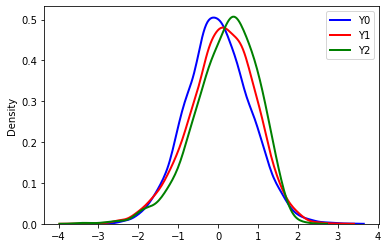

In [232]:
ax=sns.kdeplot(y_obs0,color='b',label='Y0',linewidth=2)
ax=sns.kdeplot(y_obs1,color='r',label='Y1',linewidth=2)
ax=sns.kdeplot(y_obs2,color='g',label='Y2',linewidth=2)
ax.legend()

In [233]:
seedinit4 = seedinit3+1
np.random.seed(seedinit4)

#alpha=np.random.uniform(0,0.05,1) 
Beta0=norm.rvs(loc=y_obs0_bar, scale=SEy0,size=N0)
Beta1=norm.rvs(loc=y_obs1_bar, scale=SEy1,size=N1)
Beta2=norm.rvs(loc=y_obs2_bar, scale=SEy2,size=N2)

In [234]:
statistics.stdev(Beta0)

0.7842528637334062

In [235]:
statistics.stdev(y_obs0)

0.7996179880319322

In [115]:
statistics.stdev(Beta1)

0.8365002314264023

In [116]:
statistics.stdev(y_obs1)

0.8260124083130643

In [192]:
statistics.stdev(Beta2)

0.774112253077006

In [193]:
statistics.stdev(y_obs2)

0.7871514573726177

In [194]:
np.sqrt((0.7996314049720475*0.7996314049720475)+(0.7842660228592205*0.7842660228592205))

1.1200373111771724

In [195]:
np.sqrt((0.8365274309018871*0.8365274309018871)+(0.8260392667685745*0.8260392667685745))

1.1756355782702714

In [196]:
np.sqrt((0.7871514573726177*0.7871514573726177)+(0.774112253077006*0.774112253077006))

1.1040186579980407

In [236]:
seedinit5 = seedinit4+1
np.random.seed(seedinit5)
eps0=np.random.normal(0,.34,size=N0)
eps1=np.random.normal(0,.4,size=N1)
eps2=np.random.normal(0,.4,size=N2)

In [237]:
y_initi0=Beta0+eps0
y_initi1=Beta1+eps1
y_initi2=Beta2+eps2


kde_y_initi0 = GKDE(y_initi0)
kde_y_initi1 = GKDE(y_initi1)
kde_y_initi2 = GKDE(y_initi2)

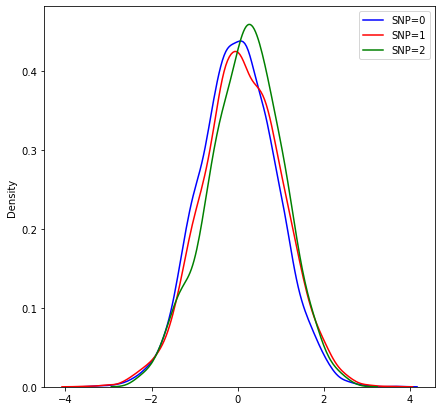

In [238]:
plt.figure(figsize=[7,7])

ax=sns.kdeplot(y_initi0,color='b',label='SNP=0',alpha=0.5)
ax=sns.kdeplot(y_initi1,color='r',label='SNP=1')
ax=sns.kdeplot(y_initi2,color='g',label='SNP=2')
ax.legend()

In [239]:
## rejection sampling for update ##
def rejection_sampling(r): # creating indexes for samples to keep from initial samples using rejection sampling 
    N = r.size 
    seedinit6 = seedinit5+1
    np.random.seed(seedinit6)
    reject_prob = np.random.uniform(low=0, high=1, size=N) 
    r = r/np.max(r)
    idx = np.where(r >= reject_prob)[0]
    return idx

In [240]:
r0=np.divide(kde_y_obs0(y_initi0),kde_y_initi0(y_initi0))
r1=np.divide(kde_y_obs1(y_initi1),kde_y_initi1(y_initi1))
r2=np.divide(kde_y_obs2(y_initi2),kde_y_initi2(y_initi2))

In [241]:
samples_to_keep0 = rejection_sampling(r0) # performing rejection sampling
samples_to_keep1 = rejection_sampling(r1)
samples_to_keep2 = rejection_sampling(r2)


accept_rate0 = samples_to_keep0.size/Beta0.shape[0]# computing acceptance rate from performing rejection sampling
accept_rate1 = samples_to_keep1.size/Beta1.shape[0]
accept_rate2 = samples_to_keep2.size/Beta2.shape[0]


print(accept_rate0) # printing acceptance rate 
print()
print(accept_rate1)
print()
print(accept_rate2)
print()

print(np.mean(r0))
print()
print(np.mean(r1))
print()
print(np.mean(r2))

0.8497720679651886

0.8256880733944955

0.8450704225352113

1.0021948047750298

1.0031675305422858

1.002277815351262


In [150]:
1-0.9999785487004449

2.1451299555108605e-05

In [173]:
1.0014191258108127-1

0.0014191258108127158

In [215]:
1.001543010491003-1

0.0015430104910030273

In [242]:
updated_Beta0 =Beta0[samples_to_keep0] # samples from updated parameter density
updated_Beta1 =Beta1[samples_to_keep1]
updated_Beta2 =Beta2[samples_to_keep2]

updated_y0 =y_initi0[samples_to_keep0] # samples from updated QoI density
updated_y1 =y_initi1[samples_to_keep1] 
updated_y2 =y_initi2[samples_to_keep2] 


kde_updated_y0 = GKDE(y_initi0, weights=r0)
kde_updated_y1 = GKDE(y_initi1, weights=r1)
kde_updated_y2 = GKDE(y_initi2, weights=r2) # updated QoI density


kde_updated_Beta0 = GKDE(Beta0, weights=r0)
kde_updated_Beta1 = GKDE(Beta1, weights=r1)
kde_updated_Beta2 = GKDE(Beta2, weights=r2)

In [243]:
updated_eps0 =eps0[samples_to_keep0]
updated_eps1 =eps1[samples_to_keep1] 
updated_eps2 =eps2[samples_to_keep2]

kde_updated_eps0 = GKDE(eps0, weights=r0)
kde_updated_eps1 = GKDE(eps1, weights=r1)
kde_updated_eps2 = GKDE(eps2, weights=r2)

In [244]:
stats.kruskal(updated_Beta0, updated_Beta1, updated_Beta2)

KruskalResult(statistic=91.27948781217128, pvalue=1.5097709548555122e-20)

In [177]:
f_oneway(updated_Beta0, updated_Beta1, updated_Beta2)

F_onewayResult(statistic=37.652742917695775, pvalue=5.240604923308617e-17)

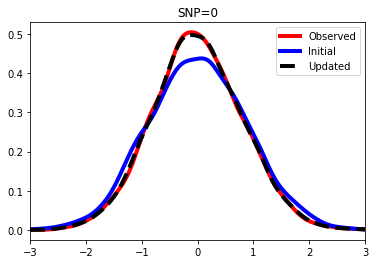

In [89]:
plot_start =-3
plot_end = 3
plot_val = np.linspace(plot_start, plot_end, num=10000) # creating y values for plots
plt.clf() # clearing plots

y_initi_plot_val = kde_y_initi0(plot_val) # initial pushforward values for plots
obs_y_plot_val = kde_y_obs0(plot_val) # observed values for plots
updated_y_val = kde_updated_y0(plot_val) # updated y values for plots

obs_plot = plt.plot(plot_val, obs_y_plot_val, 'r-', linewidth=4, label="Observed") 
init_push_plot = plt.plot(plot_val, y_initi_plot_val, 'b-', linewidth=4, label="Initial")
updated_y_plot = plt.plot(plot_val, updated_y_val, 'k--', linewidth=4, label="Updated")
plt.xlim([plot_start, plot_end])
plt.legend()
plt.title("SNP=0")
plt.show()

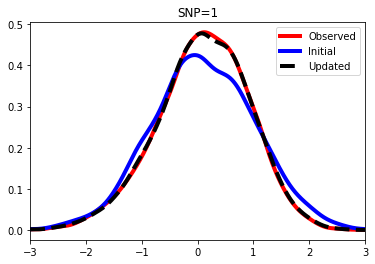

In [90]:
plot_start = -3
plot_end = 3
plot_val = np.linspace(plot_start, plot_end, num=10000) # creating y values for plots
plt.clf() # clearing plots

y_initi_plot_val = kde_y_initi1(plot_val) # initial pushforward values for plots
obs_y_plot_val = kde_y_obs1(plot_val) # observed values for plots
updated_y_val = kde_updated_y1(plot_val) # updated y values for plots

obs_plot = plt.plot(plot_val, obs_y_plot_val, 'r-', linewidth=4, label="Observed") 
init_push_plot = plt.plot(plot_val, y_initi_plot_val, 'b-', linewidth=4, label="Initial")
updated_y_plot = plt.plot(plot_val, updated_y_val, 'k--', linewidth=4, label="Updated")
plt.xlim([plot_start, plot_end])
plt.legend()
plt.title("SNP=1")
plt.show()

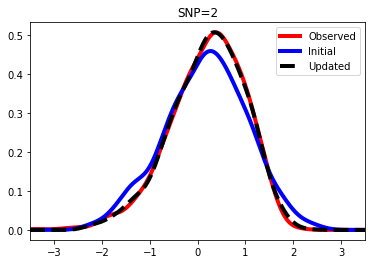

In [91]:
plot_start = -3.5
plot_end = 3.5
plot_val = np.linspace(plot_start, plot_end, num=10000) # creating y values for plots
plt.clf() # clearing plots

y_initi_plot_val = kde_y_initi2(plot_val) # initial pushforward values for plots
obs_y_plot_val = kde_y_obs2(plot_val) # observed values for plots
updated_y_val = kde_updated_y2(plot_val) # updated y values for plots

obs_plot = plt.plot(plot_val, obs_y_plot_val, 'r-', linewidth=4, label="Observed") 
init_push_plot = plt.plot(plot_val, y_initi_plot_val, 'b-', linewidth=4, label="Initial")
updated_y_plot = plt.plot(plot_val, updated_y_val, 'k--', linewidth=4, label="Updated")
plt.xlim([plot_start, plot_end])
plt.legend()
plt.title("SNP=2")
plt.show()

Text(0.5, 1.0, '$\\mu_{0}$')

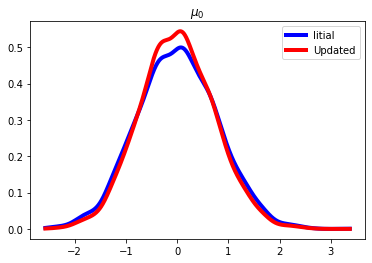

In [92]:
x=np.arange(Beta0.min(), Beta0.max(),.0012)
#x=np.arange(-6, 6,.0012)
#x2 = np.arange(BetaSK.min(), BetaSK.max(),0.0009)
kde1 =GKDE(Beta0)
y1 = kde1(x)
y2 = kde_updated_Beta0(x)

critN=np.percentile(Beta0,5)    
critSK=np.percentile(updated_Beta0,5)

#plt.figure(figsize=[7,7])
ax=plt.subplot()
ax.plot(x,y1,color='b',label='Iitial',linewidth=4)
ax.plot(x,y2,color='r',label='Updated',linewidth=4)
#_=[ax.axvline(critN,color='k',linestyle='dashed',linewidth=2)]
#_=[ax.axvline(critSK,color='k',linestyle='dashed',linewidth=2)]
#_=[ax.text(critN,ax.get_ylim()[1],f"{critN:.3f}",ha='center',va='bottom')]
#_=[ax.text(critSK,ax.get_ylim()[1],f"{critSK:.4f}",ha='center',va='bottom')]
#plt.fill_between(x, y1, 0, where = (x > x.min()) & (x <= critN), color = 'b',alpha=0.3)
#plt.fill_between(x, y2, 0, where = (x > x.min()) & (x <= critSK), color = 'r',alpha=0.3)
ax.legend(fontsize=10)
#ax.set(xlabel='x',ylabel='density')
plt.title("$\mu_{0}$")

Text(0.5, 1.0, '$\\mu_{1}$')

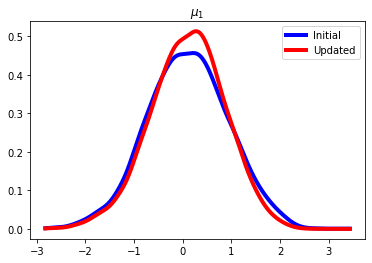

In [93]:
x=np.arange(Beta1.min(), Beta1.max(),.0012)
#x2 = np.arange(BetaSK.min(), BetaSK.max(),0.0009)
kde1 =GKDE(Beta1)
y1 = kde1(x)
y2 = kde_updated_Beta1(x)

critN=np.percentile(Beta1,5)    
critSK=np.percentile(updated_Beta1,5)

#plt.figure(figsize=[7,7])
ax=plt.subplot()
ax.plot(x,y1,color='b',label='Initial',linewidth=4)
ax.plot(x,y2,color='r',label='Updated',linewidth=4)
#_=[ax.axvline(critN,color='k',linestyle='dashed',linewidth=2)]
#_=[ax.axvline(critSK,color='k',linestyle='dashed',linewidth=2)]
#_=[ax.text(critN,ax.get_ylim()[1],f"{critN:.3f}",ha='center',va='bottom')]
#_=[ax.text(critSK,ax.get_ylim()[1],f"{critSK:.4f}",ha='center',va='bottom')]
#plt.fill_between(x, y1, 0, where = (x > x.min()) & (x <= critN), color = 'b',alpha=0.3)
#plt.fill_between(x, y2, 0, where = (x > x.min()) & (x <= critSK), color = 'r',alpha=0.3)
ax.legend(fontsize=10)
#ax.set(xlabel='x',ylabel='density')
plt.title("$\mu_{1}$")

Text(0.5, 1.0, '$\\mu_{2}$')

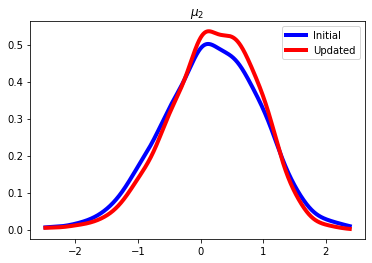

In [94]:
x=np.arange(updated_Beta2.min(), Beta2.max(),.0012)
#x2 = np.arange(BetaSK.min(), BetaSK.max(),0.0009)
kde1 =GKDE(Beta2)
y1 = kde1(x)
y2 = kde_updated_Beta2(x)

critN=np.percentile(Beta2,5)    
critSK=np.percentile(updated_Beta2,5)

#plt.figure(figsize=[7,7])
ax=plt.subplot()
ax.plot(x,y1,color='b',label='Initial',linewidth=4)
ax.plot(x,y2,color='r',label='Updated',linewidth=4)
#_=[ax.axvline(critN,color='k',linestyle='dashed',linewidth=2)]
#_=[ax.axvline(critSK,color='k',linestyle='dashed',linewidth=2)]
#_=[ax.text(critN,ax.get_ylim()[1],f"{critN:.3f}",ha='center',va='bottom')]
#_=[ax.text(critSK,ax.get_ylim()[1],f"{critSK:.4f}",ha='center',va='bottom')]
#plt.fill_between(x, y1, 0, where = (x > x.min()) & (x <= critN), color = 'b',alpha=0.3)
#plt.fill_between(x, y2, 0, where = (x > x.min()) & (x <= critSK), color = 'r',alpha=0.3)
ax.legend(fontsize=10)
#ax.set(xlabel='x',ylabel='density')
plt.title("$\mu_{2}$")

Text(0.5, 1.0, 'SNP=0')

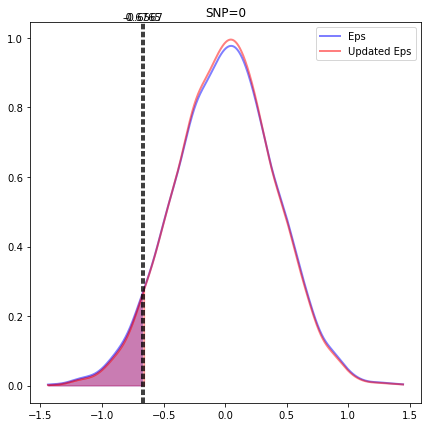

In [95]:
x=np.arange(eps0.min(), eps0.max(),.0012)
#x2 = np.arange(BetaSK.min(), BetaSK.max(),0.0009)


kde1 =GKDE(eps0)
y1 = kde1(x)

kde2=kde_updated_eps0
#kde2 = GKDE(updated_eps)
y2 = kde2(x)

critB=np.percentile(eps0,5)   
critupB=np.percentile(updated_eps0,5)

plt.figure(figsize=[7,7])
ax=plt.subplot()
ax.plot(x,y1,color='b',label='Eps',linewidth=2,alpha=0.5)
ax.plot(x,y2,color='r',label='Updated Eps',alpha=0.5,linewidth=2)
_=[ax.axvline(critB,color='k',linestyle='dashed')]
_=[ax.axvline(critupB,color='k',linestyle='dashed')]
_=[ax.text(critB,ax.get_ylim()[1],f"{critB:.4f}",ha='center',va='bottom')] 
_=[ax.text(critupB,ax.get_ylim()[1],f"{critupB:.4f}",ha='center',va='bottom')]
plt.fill_between(x, y1, 0, where = (x > x.min()) & (x <= critB), color = 'b',alpha=0.3)
plt.fill_between(x, y2, 0, where = (x > x.min()) & (x <= critupB), color = 'r',alpha=0.3)
ax.legend(fontsize=10)
#ax.set(xlabel='x',ylabel='density')
plt.title("SNP=0")

Text(0.5, 1.0, 'SNP=1')

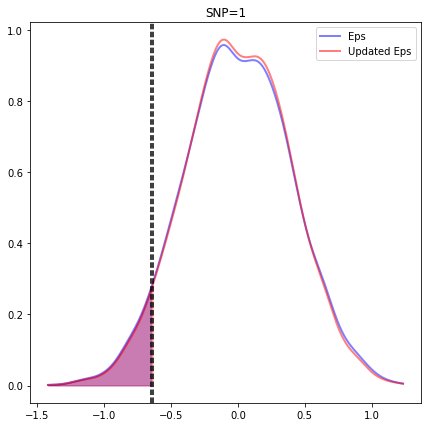

In [96]:
x=np.arange(eps1.min(), eps1.max(),.0012)
#x2 = np.arange(BetaSK.min(), BetaSK.max(),0.0009)


kde1 =GKDE(eps1)
y1 = kde1(x)

kde2=kde_updated_eps1
#kde2 = GKDE(updated_eps)
y2 = kde2(x)

critB=np.percentile(eps1,5)   
critupB=np.percentile(updated_eps1,5)

plt.figure(figsize=[7,7])
ax=plt.subplot()
ax.plot(x,y1,color='b',label='Eps',alpha=0.5,linewidth=2)
ax.plot(x,y2,color='r',label='Updated Eps',alpha=0.5,linewidth=2)
_=[ax.axvline(critB,color='k',linestyle='dashed')]
_=[ax.axvline(critupB,color='k',linestyle='dashed')]
#_=[ax.text(critB,ax.get_ylim()[1],f"{critB:.4f}",ha='center',va='bottom')] 
#_=[ax.text(critupB,ax.get_ylim()[1],f"{critupB:.4f}",ha='center',va='bottom')]
plt.fill_between(x, y1, 0, where = (x > x.min()) & (x <= critB), color = 'b',alpha=0.3)
plt.fill_between(x, y2, 0, where = (x > x.min()) & (x <= critupB), color = 'r',alpha=0.3)
ax.legend(fontsize=10)
#ax.set(xlabel='x',ylabel='density')
plt.title("SNP=1")

Text(0.5, 1.0, 'SNP=2')

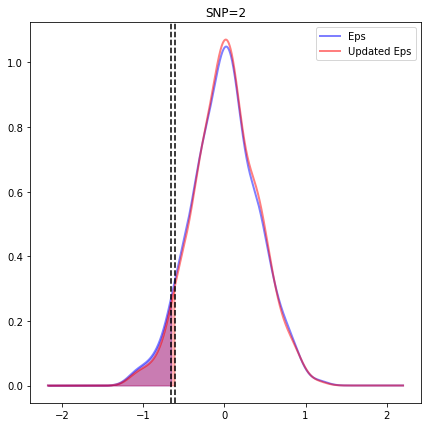

In [97]:
x=np.arange(eps2.min()-1, eps2.max()+1,.0012)
#x2 = np.arange(BetaSK.min(), BetaSK.max(),0.0009)


kde1 =GKDE(eps2)
y1 = kde1(x)

kde2=kde_updated_eps2
#kde2 = GKDE(updated_eps)
y2 = kde2(x)

critB=np.percentile(eps2,5)   
critupB=np.percentile(updated_eps2,5)

plt.figure(figsize=[7,7])
ax=plt.subplot()
ax.plot(x,y1,color='b',label='Eps',alpha=0.5,linewidth=2)
ax.plot(x,y2,color='r',label='Updated Eps',alpha=0.5,linewidth=2)
_=[ax.axvline(critB,color='k',linestyle='dashed')]
_=[ax.axvline(critupB,color='k',linestyle='dashed')]
#_=[ax.text(critB,ax.get_ylim()[1],f"{critB:.4f}",ha='center',va='bottom')] 
#_=[ax.text(critupB,ax.get_ylim()[1],f"{critupB:.4f}",ha='center',va='bottom')]
plt.fill_between(x, y1, 0, where = (x > x.min()) & (x <= critB), color = 'b',alpha=0.3)
plt.fill_between(x, y2, 0, where = (x > x.min()) & (x <= critupB), color = 'r',alpha=0.3)
ax.legend(fontsize=10)
#ax.set(xlabel='x',ylabel='density')
plt.title("SNP=2")

In [111]:
nSamp = 10000
nIter = 200
seedinit1 = 1
ac1=np.zeros((nSamp,nIter))
ac2=np.zeros((nSamp,nIter))
CV=np.zeros(nIter)
for j in range(nIter):
    seedinit1 = seedinit1 + j
    np.random.seed(seedinit1)
    CV[j]=np.random.uniform(0.15,0.5,1)
    
    unifc1=np.random.uniform(0,1,nSamp)
    unifc2=np.random.uniform(0,1,nSamp)
    
    for i in range(nSamp):
        if unifc1[i] <= CV[j]:
            ac1[i,j]=1
            
    for k in range(nSamp):
        if unifc2[k] <= CV[j]:
            ac2[k,j]=1
            
Xs=ac1+ac2
Xs.shape

(10000, 200)

In [33]:
N=np.zeros((3,nIter))

for j in range(nIter):
    for i in range(nSamp):
        if Xs[i,j]==0 :
            N[0,j]+= 1
        elif Xs[i,j]==1:
            N[1,j] += 1
        else:
            N[2,j]+= 1

In [34]:
Xs_bar = np.zeros(nIter)
SEb = np.zeros(nIter)
SEe=np.zeros(nIter)
for j in range(nIter):
    Xs_bar[j]=np.mean(Xs[:,j])
    Sxx = np.sum(Xs[:,j]*Xs[:,j])-nSamp*Xs_bar[j]*Xs_bar[j]
    sigma=.9
    SEb[j]= np.sqrt(sigma/Sxx)
    SEe[j]=.9-SEb[j]

In [35]:
B = np.zeros((nSamp,nIter))
e = np.zeros((nSamp,nIter))
y_obs= np.zeros((nSamp,nIter))
seedinit2 = seedinit1+1
for j in range(nIter):    
    seedinit2 = seedinit2+j
    np.random.seed(seedinit2)

    B[0:int(N[0,j]),j] = skewnorm.rvs(.7, loc=-.3976 , scale=.9, size=int(N[0,j]))
    B[int(N[0,j]):int(N[0,j])+int(N[1,j]),j] = skewnorm.rvs(-1.5, loc=.8259, scale=1.1 , size=int(N[1,j]))
    B[int(N[0,j])+int(N[1,j]):nSamp,j] = skewnorm.rvs(-2.5, loc=1.103 , scale=1.2 , size=int(N[2,j]))
    
    e[0:int(N[0,j]),j]=np.random.normal(0,SEb[j],size=int(N[0,j]))
    e[int(N[0,j]):int(N[0,j])+int(N[1,j]),j]=np.random.normal(0,SEb[j] ,size=int(N[1,j]))
    e[int(N[1,j])+int(N[0,j]):nSamp,j]=np.random.normal(0,SEb[j] ,size=int(N[2,j]))
    
y_obs=B+e

In [36]:
y_obs_bar = np.zeros((3,nIter))
SEy=np.zeros((3,nIter))
Sy=np.zeros(3)
for j in range(nIter):
        y_obs_bar[0,j]=np.mean(y_obs[0:int(N[0,j]),j])
        y_obs_bar[1,j]=np.mean(y_obs[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])
        y_obs_bar[2,j]=np.mean(y_obs[int(N[1,j])+int(N[0,j]):nSamp,j])
        Sy[0]= np.sum(y_obs[0:int(N[0,j]),j]*y_obs[0:int(N[0,j]),j])-N[0,j]*y_obs_bar[0,j]*y_obs_bar[0,j]
        Sy[1]= np.sum(y_obs[int(N[0,j]):int(N[0,j])+int(N[1,j]),j]*y_obs[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])-N[1,j]*y_obs_bar[1,j]*y_obs_bar[1,j]
        Sy[2]= np.sum(y_obs[int(N[1,j])+int(N[0,j]):nSamp,j]*y_obs[int(N[1,j])+int(N[0,j]):nSamp,j])-N[2,j]*y_obs_bar[2,j]*y_obs_bar[2,j]
        SEy[0,j]= np.sqrt(Sy[0]/(int(N[0,j])-1))
        SEy[1,j]= np.sqrt(Sy[1]/(int(N[1,j])-1))
        SEy[2,j]= np.sqrt(Sy[2]/(int(N[2,j])-1))

In [37]:
Beta = np.zeros((nSamp,nIter))
eps = np.zeros((nSamp,nIter))
y_initi= np.zeros((nSamp,nIter))
seedinit3 = seedinit2+1
for j in range(nIter):    
    seedinit3 = seedinit3+j
    np.random.seed(seedinit3)
    Beta[0:int(N[0,j]),j] = norm.rvs(loc=y_obs_bar[0,j] , scale=SEy[0,j], size=int(N[0,j]))
    Beta[int(N[0,j]):int(N[1,j])+int(N[0,j]),j] = norm.rvs(loc=y_obs_bar[1,j], scale=SEy[1,j], size=int(N[1,j]))
    Beta[int(N[1,j])+int(N[0,j]):nSamp,j] = norm.rvs(loc=y_obs_bar[2,j] , scale=SEy[2,j], size=int(N[2,j]))
    
    eps[0:int(N[0,j]),j]=np.random.normal(0,.35,size=int(N[0,j]))
    eps[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]=np.random.normal(0,.35,size=int(N[1,j]))
    eps[int(N[1,j])+int(N[0,j]):nSamp,j]=np.random.normal(0,.35,size=int(N[2,j]))
    
y_initi=Beta+eps

In [38]:
r = np.zeros((nSamp,nIter))
for j in range(nIter):
            kde_y_obs0=GKDE(y_obs[0:int(N[0,j]),j])
            kde_y_initi0=GKDE(y_initi[0:int(N[0,j]),j])
            r[0:int(N[0,j]),j]=np.divide(kde_y_obs0(y_initi[0:int(N[0,j]),j]),kde_y_initi0(y_initi[0:int(N[0,j]),j]))
            kde_y_obs1=GKDE(y_obs[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])
            kde_y_initi1=GKDE(y_initi[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])
            r[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]=np.divide(kde_y_obs1(y_initi[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]),kde_y_initi1(y_initi[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]))
            kde_y_obs2=GKDE(y_obs[int(N[1,j])+int(N[0,j]):nSamp,j])
            kde_y_initi2=GKDE(y_initi[int(N[0,j])+int(N[1,j]):nSamp,j])
            r[int(N[0,j])+int(N[1,j]):nSamp,j]=np.divide(kde_y_obs2(y_initi[int(N[0,j])+int(N[1,j]):nSamp,j]),kde_y_initi2(y_initi[int(N[0,j])+int(N[1,j]):nSamp,j]))
            

In [39]:
def rejection_sampling(r): # creating indexes for samples to keep from initial samples using rejection sampling 
    N = r.size 
    seedinit4 = seedinit3+1
    np.random.seed(seedinit4)
    reject_prob = np.random.uniform(low=0, high=1, size=N) 
    r = r/np.max(r)
    idx = np.where(r >= reject_prob)[0]
    return idx

In [40]:
samples_to_keepSize=np.zeros((3,nIter))
accept_rate=np.zeros((3,nIter))
for j in range(nIter):
    samples_to_keepSize[0,j] = rejection_sampling(r[0:int(N[0,j]),j]).size
    samples_to_keepSize[1,j]=rejection_sampling(r[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]).size
    samples_to_keepSize[2,j] = rejection_sampling(r[int(N[1,j])+int(N[0,j]):nSamp,j]).size


    accept_rate[0,j] = samples_to_keepSize[0,j]/N[0,j]
    accept_rate[1,j] = samples_to_keepSize[1,j]/N[1,j]
    accept_rate[2,j] = samples_to_keepSize[2,j]/N[2,j]

In [41]:
samples_to_keep=np.zeros((nSamp,nIter))

for j in range(nIter):
    samples_to_keep[0:int(samples_to_keepSize[0,j]),j]= rejection_sampling(r[0:int(N[0,j]),j])
    samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j]= rejection_sampling(r[int(N[0,j]):int(N[0,j])+int(N[1,j]),j])+int(N[0,j])
    samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j]= rejection_sampling(r[int(N[0,j])+int(N[1,j]):nSamp,j])+int(N[0,j])+int(N[1,j])
    
    

In [42]:
updated_Beta=np.zeros((nSamp,nIter))
updated_y=np.zeros((nSamp,nIter))
updated_eps=np.zeros((nSamp,nIter))
for j in range(nIter):
    updated_Beta[0:int(samples_to_keepSize[0,j]),j] =Beta[samples_to_keep[0:int(samples_to_keepSize[0,j]),j].astype(int),j]
    updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j] =Beta[samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j].astype(int),j]
    updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j] =Beta[samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j].astype(int),j]
    
    updated_y[0:int(samples_to_keepSize[0,j]),j] =y_initi[samples_to_keep[0:int(samples_to_keepSize[0,j]),j].astype(int),j]
    updated_y[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j] =y_initi[samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j].astype(int),j]
    updated_y[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j] =y_initi[samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j].astype(int),j]
    
    updated_eps[0:int(samples_to_keepSize[0,j]),j] =eps[samples_to_keep[0:int(samples_to_keepSize[0,j]),j].astype(int),j]
    updated_eps[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j] =eps[samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j].astype(int),j]
    updated_eps[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j] =eps[samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j].astype(int),j]
    
    

In [43]:
KruskalStat=np.zeros(nIter)
KruskalPvalue=np.zeros(nIter)
for j in range(nIter):
    KruskalStat[j]=stats.kruskal(updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j])[0]
    KruskalPvalue[j]=stats.kruskal(updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j])[1]
    

In [44]:
KruskalPvalue.max()

0.0031883364659293727

In [45]:
(KruskalPvalue >.00000005).sum()

15

In [46]:
KruskalPvalue.min()

6.218552275218991e-42

In [57]:
(200-15)/200

0.925

In [48]:
for j in range(nIter):
    index0=np.where(Xs[:,j] == 0)
    index1=np.where(Xs[:,j] == 1)
    index2=np.where(Xs[:,j] == 2)
    Xs0=Xs[:,j][index0]
    Xs1=Xs[:,j][index1]
    Xs2=Xs[:,j][index2]
    Xs[:,j]=np.concatenate((Xs0,Xs1,Xs2), axis=None) 

In [49]:
#X=np.zeros((nSamp,2))
OLS_Pvalues=np.zeros(nIter)
for j in range(nIter):
    X=sm.add_constant(Xs[:,j])
    est=sm.OLS(y_obs[:,j],X).fit()
    OLS_Pvalues[j]=est.pvalues[1]



In [50]:
OLS_Pvalues.max()

5.327204733146198e-05

In [51]:
OLS_Pvalues.min()

2.2793873020541143e-36

In [52]:
(OLS_Pvalues >.00000005).sum()

17

In [56]:
(200-17)/200


0.915

In [531]:
DunnPvalueUpB0_B1=np.zeros(nIter)
DunnPvalueUpB1_B2=np.zeros(nIter)
DunnPvalueUpB0_B2=np.zeros(nIter)

for j in range(nIter):

        DunnPvalueUpB0_B1[j]=sp.posthoc_dunn([updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j]], p_adjust = 'bonferroni').loc[1,2]
        DunnPvalueUpB1_B2[j]=sp.posthoc_dunn([updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j]], p_adjust = 'bonferroni').loc[2,3]
        DunnPvalueUpB0_B2[j]=sp.posthoc_dunn([updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j]], p_adjust = 'bonferroni').loc[1,3]
        
        

In [ ]:
DunnPvalueUpB0_B1.max()

In [ ]:
DunnPvalueUpB0_B2.max()

In [ ]:
DunnPvalueUpB1_B2.max()

In [ ]:
(DunnPvalueUpB1_B2 ==1).sum()

In [ ]:
(DunnPvalueUpB0_B1 >.00000005).sum()

In [ ]:
(DunnPvalueUpB1_B2 >.00000005).sum()

In [ ]:
(DunnPvalueUpB0_B2 >.00000005).sum()

In [ ]:
mannwhitneyPvalueUpB0_B1=np.zeros(nIter)
mannwhitneyPvalueUpB1_B2=np.zeros(nIter)
mannwhitneyPvalueUpB0_B2=np.zeros(nIter)

for j in range(nIter):

        mannwhitneyPvalueUpB0_B1[j]=sp.posthoc_mannwhitney([updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j]], p_adjust = 'bonferroni').loc[1,2]
        mannwhitneyPvalueUpB1_B2[j]=sp.posthoc_mannwhitney([updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j]], p_adjust = 'bonferroni').loc[2,3]
        mannwhitneyPvalueUpB0_B2[j]=sp.posthoc_mannwhitney([updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j]], p_adjust = 'bonferroni').loc[1,3]
        

In [ ]:
mannwhitneyPvalueUpB0_B1.max()

In [ ]:
mannwhitneyPvalueUpB1_B2.max()

In [ ]:
(mannwhitneyPvalueUpB1_B2 >.00000005).sum()

In [ ]:
(mannwhitneyPvalueUpB0_B1 >.00000005).sum()

In [ ]:
(mannwhitneyPvalueUpB0_B2 ==1).sum()

In [ ]:
mannwhitneyPvalueUpB0_B2.max()

In [ ]:
(mannwhitneyPvalueUpB0_B2 >.00000005).sum()

In [993]:
np.savetxt('Xs.txt',Xs)

In [994]:
dump(kde_updated_Beta , 'kde_updated_Beta.joblib')

NameError: name 'kde_updated_Beta' is not defined

In [ ]:
y_obs_bar